In [1]:
import numpy as np
import pandas as pd
import scipy as sci 
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('titanic_train_kaggle.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 714)
data = pd.DataFrame(data[[
    'Survived',
    'Sex',
    'Age',
    'Fare'
]])
data = data.dropna()

scaler = StandardScaler()
age = data['Age'].values.reshape(-1,1)
data['Age'] = scaler.fit_transform(age)

fare = data['Fare'].values.reshape(-1,1)
data['Fare'] = scaler.fit_transform(fare)

data['Sex'] = data['Sex'].map({'female':0,'male':1}).astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
Survived    714 non-null int64
Sex         714 non-null int32
Age         714 non-null float64
Fare        714 non-null float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 25.1 KB


In [21]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

              
def sig_der(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [22]:




learning_rate = .01

inputs = data.loc[:,['Sex','Age','Fare']].values
train_outputs = data.loc[:,'Survived'].values
weights = np.random.randn(3,1)*np.sqrt(2/(3))
print('Weights Before Train')
print(weights)

B = .05

for i in range(100):

    input_layer = inputs
    X = np.dot(input_layer,weights) + B
    outputs = sigmoid(X)

    train_outputs = train_outputs.reshape(-1,1)

    error = outputs - train_outputs
    
    der = sig_der(outputs)
    z_delta = error * der
    
#     adjust = np.dot(input_layer.T, sig_der(input_layer, weights, B) * error)
    
    weights -= learning_rate * np.dot(input_layer.T,z_delta)
    for num in z_delta:
        B -= learning_rate * num

print('Weights After Train')
print(weights)
print(B)
out_r = []
for i in outputs:
    if i >= 0.5:
        out_r.append(1)
    else:
        out_r.append(0)
# print(list(zip(out_r,train_outputs)))

# print(outputs)

Weights Before Train
[[ 0.8230829 ]
 [-0.0227357 ]
 [-0.06477382]]
Weights After Train
[[-2.31583198]
 [-0.17173565]
 [ 0.69787461]]
[1.0446326]


In [23]:

# Weights After Train
# [[-2.33628522]
#  [-0.17116952]
#  [ 0.69766165]]
# [1.05987224]


print(input_layer.T)

[[ 1.          0.          0.         ...  0.          1.
   1.        ]
 [-0.53037664  0.57183099 -0.25482473 ... -0.73704057 -0.25482473
   0.15850313]
 [-0.51897787  0.69189675 -0.50621356 ... -0.08877362 -0.08877362
  -0.50952283]]


1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       424
           1       0.74      0.69      0.72       290

    accuracy                           0.78       714
   macro avg       0.77      0.76      0.77       714
weighted avg       0.78      0.78      0.78       714



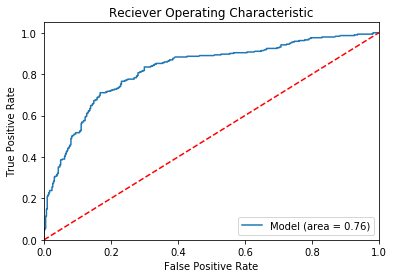

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

def ModelScore(y_true, y_pred,output):
    print('1= Survived', '0= Did Not Survive')
    print(classification_report(y_true, y_pred))
    roc_auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true,output)
    plt.figure()
    plt.plot(fpr, tpr, label='Model (area = %.2f)'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
ModelScore(train_outputs,out_r,outputs)

In [25]:
from ipywidgets import interactive
import ipywidgets as widgets

x = data['Sex'].values
y = data['Fare'].values
graph_weight = []
B = 0.5
for i in range(100):
    graph_weight.append(np.random.randint(-5,5,size=3)/np.random.randint(1,5,size=3))


errors = []
for i in range(100):
    pred = np.array(sigmoid(np.dot(input_layer,graph_weight[i]))).ravel()

    error = np.mean((pred - train_outputs)**2)
    errors.append(error)
    
    
errors = np.array(errors) 

x = [graph_weight[i][0] for i in range(100)]
y = [graph_weight[i][1] for i in range(100)]

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
def plot(ix,iy):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(x,y,errors,cmap=cm.magma)

    ax.view_init(iy,ix)
    ax.set_title('Loss Function for Single Layer Perceptron NN')
    ax.set_xlabel('Weight1 (multiplied by Sex)')
    ax.set_ylabel('Weight2 (multiplied by Age)')
    ax.set_zlabel('Loss')

inter_plot = interactive(plot,ix=widgets.FloatSlider(min=0,max=360,step=15,value=135),iy=widgets.FloatSlider(min=-180,max=180,step=15,value=20))
inter_plot

interactive(children=(FloatSlider(value=135.0, description='ix', max=360.0, step=15.0), FloatSlider(value=20.0…

## Now Building NN Class with hidden relu activation layer 

In [9]:
class Relu:
    @staticmethod
    def activation(z):
        z[z<0] = 0
        return z
    @staticmethod
    def prime(z):
        z[z<0] = 0
        z[z>0] = 1
        return z
    
    
class Sigmoid:
    @staticmethod
    def activation(z):
        return 1 / (1+ np.exp(-z))
    @staticmethod
    def prime(z):
        return Sigmoid.activation(z) * (1 - Sigmoid.activation(z))

In [10]:
class NeuralNetwork():
    def __init__(self, dimensions, activations):
        #dimensions param: tuple of dimensions for NN, (input, hidden layer, output)
        #activations param: tuple of activation fuctions
        self.n_layers = len(dimensions)
        self.loss = None
        self.learning_rate = None
        
        self.w = {}
        self.b = {}
        self.activations = {}
        self.train_history = {'epochs':[], 
                              'loss': [], 
                              'accuracy': []}
        self.val_history = {'epochs':[], 
                            'loss': [], 
                            'accuracy': []}
        self.test_history = {'epochs':[], 
                            'loss': [], 
                            'accuracy': []}
        for i in range(len(dimensions) - 1):
            #if dimensions = (3,4,1):
            #weight[1] = random array with size (3,4)(row, col)s
            #weight[2] = random array with size(4,1)
            self.w[i+1] = np.random.randn(dimensions[i],dimensions[i+1]) / np.sqrt(dimensions[i])
            self.b[i+1] = 2 * np.random.random_sample(dimensions[i+1]) + 1
            self.activations[i+2] = activations[i]
            

    def _feed_forward(self, x):
        #param x: array of input data vectors( array of arrays )
        
        #pass data forward through NN
        #z has keys 2 and 3 for the weightged sums at each neuron
        ### so z[2] is (n_rows_training, n_neurons in layer2) shape
        ### each row in z[2] has four columns, each row represents a row of training data being passed
        ### through NN and each column is the sum of that training row at a given nueron (x1w1 +x2w2... +xnwn +b)
        ### the weights will be differnet for each x going into each neuron
        
        # z = W1X1 + W2X2 ... + WnXn + Bias 
        z = {}
        
        #outputs or activations of each layer
        #input layer 1 just outputs the inputs
        # input layer 2 (for RElU then Sigmoid network) outputs used in next iteration of z
        
        # a = f(z)
        a = {1 : x}
        
        for i in range(1, self.n_layers):
            #fill z[i+1] with dot product of weights[i'th layer] and outputs (a) of i'th layer
            z[i+1] = np.dot(a[i], self.w[i]) + self.b[i]
            #fill outputs (a[i+1]) by applying activation fuction[i+1] (only layer 2 and 3 have activation)  to 
            #to the just calculated z[i+1] dot prod of weght * x
            a[i+1] = self.activations[i+1].activation(z[i+1])
         
        #dictionaries with keys for corresponding layer
        return z, a
    
    def predict(self, x):
        #x param: array containing x input array
        
        _ , a = self._feed_forward(x)
        
        #returns last layer's output
        #this is the models prediction 
        #here is is through sigmoid function so between 0-1 for proba survive
        return a[self.n_layers]
        
    def _update_w_b(self, index, dw, delta):
        #index param: index of layer 
        #dw param: array of partial derivatives for weights 
        #delta param: delta error (combined partial dervatives for chain rule for partial der with respect to weights)
        
        #subtract learning rate times derivative of cost fuction with respect to each weight at each layer 
        #from each corresponding weight to move weights towards more accurate (less loss) values
        # Bias partial derivative is slightly differnt than weights and needs one less chain-rule to calculate

        self.w[index] -= self.learning_rate * dw

        self.b[index] -= self.learning_rate * np.mean(delta, 0)
        
    def _back_prop(self, z, a ,y_true):
        #z param: dictionary w(x) +b
        # a param: dict f(z)
        #loss will be called in the 'fit' method, using MSE here
        #delta method returns partial derivative of loss func w respect to predicted value
        #times the derivative of optimization function at given layer
       
        
        delta = self.loss.delta(y_true, a[self.n_layers])
        
        #matrix multiply delta by the given layers transposed inputs and thats the three chains for partial 
        #derivative of loss function
        #doing all in matrix multiplication is much faster than using for/while loops and essentially calculates
        #all partial derivatives at once
        
        dw = np.dot(a[self.n_layers - 1].T, delta)
        
        
        #update params = dictionary with key for each layer 0f NN
        #layer 1 has (input dim, num nuerons in second layer) shaped derivative of weights as dw, 
        #and (batch_size,num nuerons in second layer) shaped delta for num nuerons in second layer z funcs at 2nd
        
        #layer 2 has (4,1) shaped derivative of 4 weights in second layer (from relu to sigmoid)
        #and (batch_size,1) delta because just on z func (or neuron) at sigmoid layer
     
        
        update_params = {
            self.n_layers - 1 : (dw, delta)
        }
        
        for i in reversed(range(2,self.n_layers)):
            
            # mult previous layer's delta by it's weights (while iterating) by given layers activation functions derivative
            # to get current layers delta. (biases adjust by: minus 1*(delta), weights adjusted by: minus delta * previous layers activations)
            # we do this in batches with dot products and transposed activation matrixes to get a sum of partial derivatives for each row in batch 
            # ran through NN.  Too large of batch size (or strange distributions in training data) can make this combination too
            #extreme in either direction (+/-)
            delta = np.dot(delta, self.w[i].T) * self.activations[i].prime(z[i])
            
            # now dot prod the delta matrix and previous layers activation matrix transposed
            dw = np.dot(a[i - 1].T, delta)

            update_params[i-1] = (dw,delta)

        for k,v in update_params.items():

            self._update_w_b(k, v[0], v[1])
            
        
    def fit(self, x, y_true, loss, epochs, batch_size, learning_rate,xtest, ytest,validation_split=0.4,plot=True):
        if x.shape[0] != y_true.shape[0]:
            raise ValueError('Lengh of x and y arrays dont match')
        #passing in activation function for loss class
        self.loss = loss(self.activations[self.n_layers])
        self.learning_rate = learning_rate
        
        #shuffle data for creating random validation sample
        seed = np.arange(x.shape[0])
        np.random.shuffle(seed)
        x = x[seed]
        y = y_true[seed]
        
        val_index = int(round(len(y_true)*validation_split,0))

        x_train = x[val_index:]
        y_train = y[val_index:]
        x_val = x[:val_index]
        y_val = y[:val_index]
        
        for i in range(epochs):
            # Shuffle the data
            #stochastic gradient decent for faster processing
            #uses sample of points rather than full training set to calculate partial derivatives
            seedt = np.arange(x_train.shape[0])
            np.random.shuffle(seedt)
            x_ = x_train[seedt]
            y_ = y_train[seedt]
            
            
            for j in range(x_.shape[0] // batch_size):
                #k = lower bound of sample
                k = j * batch_size
                #upper bound of sample
                l = (j + 1) * batch_size
                z, a = self._feed_forward(x_[k:l])
                self._back_prop(z, a, y_[k:l])
                
         
            if (i + 1) % 15 == 0:
                test_pred = self.predict(x_train)

                print("Epoch {}, Loss: {}".format(i,self.loss.loss(y_train, test_pred)))
                losst = self.loss.loss(y_train, test_pred)
                accuracyt = self.accuracy(y_train, test_pred)
    
                self.train_history['epochs'].append(i)
                self.train_history['loss'].append(losst)
                self.train_history['accuracy'].append(accuracyt)

                
                val_pred = self.predict(x_val)

                lossv = self.loss.loss(y_val, val_pred)
                accuracyv = self.accuracy(y_val, val_pred)
                self.val_history['accuracy'].append(accuracyv)
                self.val_history['epochs'].append(i)
                self.val_history['loss'].append(lossv)
                
                val_test = self.predict(xtest)

                losste = self.loss.loss(ytest, val_test)
                accuracyte = self.accuracy(ytest, val_test)
                
                self.test_history['accuracy'].append(accuracyte)
                self.test_history['epochs'].append(i)
                self.test_history['loss'].append(losste)
                


                
        if plot == True:
            self.plot_loss()
            
            
        
        
        
    def plot_loss(self):
        f = plt.figure(figsize=(10,5))
        f.suptitle("SGD Optimization with {} learning rate".format(self.learning_rate))
        ax = f.add_subplot(1,2,1)
        x = self.train_history['epochs']
        y = self.train_history['loss']

        x2 = self.val_history['epochs']
        y2 = self.val_history['loss']
        ax.plot(x,y,label="Train")
        ax.plot(x2,y2,label='Validate')
        ax.set_title("Loss")
        
        x3 = self.test_history['epochs']
        y3 = self.test_history['loss']
       
        ax.plot(x3,y3,label='Test')
        ax.set_title("Loss")

        ax.set_ylabel("loss")
        ax.set_xlabel('Epochs')
        plt.legend()

        
        ax = f.add_subplot(1,2,2)
        xt = self.train_history['epochs']
        yt = self.train_history['accuracy']
        xv = self.val_history['epochs']
        yv = self.val_history['accuracy']
        x3 = self.test_history['epochs']
        y3 = self.test_history['accuracy']
        ax.plot(xt,yt, label='Train')
        ax.plot(xv,yv, label='Validate')
        ax.plot(x3,y3,label="Test")
        ax.set_ylabel("Accuracy")
        ax.set_xlabel('Epochs')
        ax.set_title("Accuracy")
# #         plt.legend()
        plt.show()
        
    def accuracy(self, y_true, y_pred):
        C = 0
        I = 0
        y_pred_round = []
        for i in y_pred:
            if i >= .5:
                y_pred_round.append(1)
            else:
                y_pred_round.append(0)
       
        for true, pred in zip(y_true, y_pred_round):
            if true == pred:
                C += 1
            else:
                I += 1
        return round(C/(I+C),3)
        
        
class MSE:
    def __init__(self, activation_fn):
        #param activation_fn: Class object of activation function
        self.activation_fn = activation_fn
    def activation(self, z):
        return self.activation_fn.activation(z)


    def loss(self, y_true, y_pred):
        return np.mean((y_pred - y_true)**2)
    

    def prime(self, y_true, y_pred):
        #partial derrivative for chain rule
        return (y_pred - y_true)
        
    def delta(self, y_true, y_pred):
        #combining partial activation derivative and derivative of MSE with respect to y_pred
         return self.prime(y_true, y_pred) * self.activation_fn.prime(y_pred)

    
        
        
        


Epoch 14, Loss: 0.2334320212912687
Epoch 29, Loss: 0.2186789132988092
Epoch 44, Loss: 0.20862260831102836
Epoch 59, Loss: 0.2011649432810515
Epoch 74, Loss: 0.1955292585950354
Epoch 89, Loss: 0.19102212073563146
Epoch 104, Loss: 0.187101383264274
Epoch 119, Loss: 0.1838169701993358
Epoch 134, Loss: 0.18099623421511646
Epoch 149, Loss: 0.17836753517207185
Epoch 164, Loss: 0.17630532070841118
Epoch 179, Loss: 0.17444717665732326
Epoch 194, Loss: 0.17290399609317336
Epoch 209, Loss: 0.17141390288641714
Epoch 224, Loss: 0.17025001929390365
Epoch 239, Loss: 0.16919594071034808


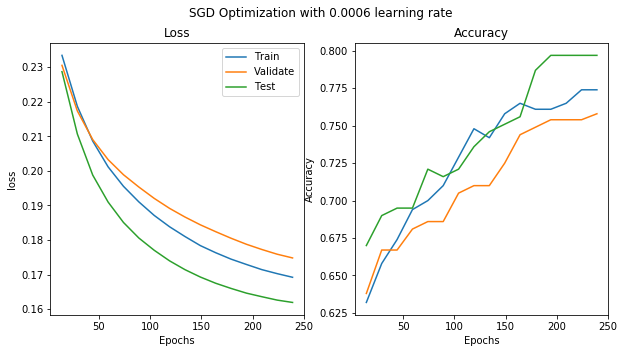

Testing Data
Corrects:  157
Incorrects:  40
Percent Correct:  0.7969543147208121
1= Survived 0= Did Not Survive
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       122
           1       0.75      0.69      0.72        75

    accuracy                           0.80       197
   macro avg       0.79      0.78      0.78       197
weighted avg       0.79      0.80      0.80       197



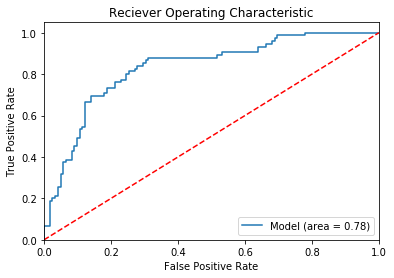

In [11]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('titanic_train_kaggle.csv')

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 714)
data = pd.DataFrame(data[[
    'Survived',
    'Sex',
    'Age',
    'Fare'
]])
data = data.dropna()

scaler = StandardScaler()
age = data['Age'].values.reshape(-1,1)
data['Age'] = scaler.fit_transform(age)

fare = data['Fare'].values.reshape(-1,1)
data['Fare'] = scaler.fit_transform(fare)

data['Sex'] = data['Sex'].map({'female':0,'male':1}).astype(int)
inputs = data.loc[:,['Sex','Age','Fare']].values

train_outputs = data.loc[:,'Survived'].values
train_outputs = train_outputs.reshape(-1,1)

x = inputs
y = train_outputs

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.275, random_state=1)



np.random.seed(41)



nn = NeuralNetwork((3, 5, 1), (Relu, Sigmoid))
nn.fit(X_train,y_train,loss=MSE,epochs=250,xtest=X_test,ytest=y_test,batch_size=25,learning_rate=.0006)
predictions = nn.predict(X_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


C = 0
I = 0
for i,j in zip(y_pred,y_test):
    if i == j:
        C += 1
    else:
        I += 1
        

print('='*15)
print('Testing Data')        
print('Corrects: ',C)
print('Incorrects: ', I)
print('Percent Correct: ', C/(I+C))
print('='*15)
ModelScore(y_test,y_pred,predictions)

In [12]:
#weights after training
#keys represent layers 



nn.w

{1: array([[-0.70046548,  0.48698236,  0.38233232, -0.12921791,  0.63588691],
        [-0.64701996, -0.01416481,  0.50374355, -0.57031377, -0.49527185],
        [-0.19068866, -0.66256315, -0.45313913, -0.11657044, -0.61991528]]),
 2: array([[ 1.05735338],
        [-0.71137415],
        [-0.38337256],
        [-0.40272392],
        [-0.58452491]])}

In [13]:

#bias terms 
nn.b

{1: array([2.4938022 , 1.79394401, 2.21561425, 2.45487682, 1.84233343]),
 2: array([2.17036276])}

In [14]:
nn.activations

{2: __main__.Relu, 3: __main__.Sigmoid}

In [15]:
nn.val_history

{'epochs': [14,
  29,
  44,
  59,
  74,
  89,
  104,
  119,
  134,
  149,
  164,
  179,
  194,
  209,
  224,
  239],
 'loss': [0.230538919937787,
  0.21733745929643464,
  0.20905166821544127,
  0.20325167878908104,
  0.1988832049371155,
  0.19532245500442194,
  0.19203471245127185,
  0.1891392381758356,
  0.18664101509048217,
  0.18438383425624988,
  0.18239410248790874,
  0.1804961226233169,
  0.17874962124730973,
  0.17724448079944716,
  0.1758726925546553,
  0.17479558012311944],
 'accuracy': [0.638,
  0.667,
  0.667,
  0.681,
  0.686,
  0.686,
  0.705,
  0.71,
  0.71,
  0.725,
  0.744,
  0.749,
  0.754,
  0.754,
  0.754,
  0.758]}

In [16]:
## Now testing NN on sklearn digit reconition data set 
#########################################################################
## HAVE TO COMMENT OUT EVERYTHING RELATED TO ACCURACY IN .FIT() METHOD 
## THAT ACCURACY CALC ONLY FOR BINARY CLASSIF. FOR NOW
## COMMENT OUT AND THEN RE-RUN THE CELL DEFINING NN CLASS
##########################################################################
from sklearn import datasets
import sklearn.metrics
np.random.seed(1)
data = datasets.load_digits()

x = data["data"]
y = data["target"]

y = np.eye(10)[y]


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=1)

nn = NeuralNetwork((64, 25, 10), (Relu, Sigmoid))
nn.fit(X_train, y_train,xtest=X_test, ytest=y_test, loss=MSE, epochs=500, batch_size=1, learning_rate=.00005,validation_split=0.25)

prediction = nn.predict(X_test)

y_true = []
y_pred = []
for i in range(len(y_test)):
    y_pred.append(np.argmax(prediction[i]))
    y_true.append(np.argmax(y_test[i]))

print(sklearn.metrics.classification_report(y_true, y_pred))
C = 0
I = 0
for i,j in zip(y_pred,y_true):
    if i == j:
        C += 1
    else:
        I += 1
print('='*15)
print('Testing Data')        
print('Corrects: ',C)
print('Incorrects: ', I)
print('Percent Correct: ', C/(I+C))
print('='*15)

Epoch 14, Loss: 0.06426441468853718


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
x = nn.val_history['epochs']
y = nn.val_history['loss']
plt.plot(x,y)

In [ ]:
x = nn.train_history['epochs']
y = nn.train_history['loss']
x2 = nn.val_history['epochs']
y2 = nn.val_history['loss']
plt.plot(x,y)
plt.plot(x2,y2)

In [ ]:
for i in reversed(range(2, 5)):
    print(i)